## TensorFlow Intro

In [1]:
import tensorflow as tf

/home/harshal/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/harshal/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/harshal/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/harshal/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

## Generating Data

In [2]:
observations = 1000

xs = np.random.uniform(-10,10, (1000,1))
zs = np.random.uniform(-10,10, (1000,1))
generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1,1,(observations, 1))

generated_target = 2*xs - 3*zs + noise

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
np.savez("TF_into", input=generated_inputs, targets = generated_target)

<IPython.core.display.Javascript object>

## Solving using TensorFlow

In [4]:
input_size = 2
output_size = 1

## Outlining the model

In [5]:
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random_uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1, maxval=0.1))

In [6]:
outputs = tf.matmul(inputs, weights) + biases

## Choosing the objective function and the optimizing method

In [7]:
mean_loss = tf.losses.mean_squared_error(labels = targets, predictions=outputs)/2.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

## Prepare for execution

In [9]:
sess = tf.InteractiveSession()

## Initiazing variables

In [10]:
initializer = tf.global_variables_initializer()

sess.run(initializer)

## Loading data

In [11]:
traing_data = np.load("TF_into.npz")

<IPython.core.display.Javascript object>

## Learning

In [12]:
for e in range(100):
    _, curr_loss = sess.run([optimize, mean_loss], feed_dict={inputs:traing_data["input"],targets: traing_data["targets"]})
    print(curr_loss)
    print("-"*25)

224.4434
-------------------------
111.84275
-------------------------
57.24616
-------------------------
30.100336
-------------------------
16.24635
-------------------------
8.991492
-------------------------
5.0995307
-------------------------
2.9660559
-------------------------
1.7746893
-------------------------
1.0991414
-------------------------
0.7113356
-------------------------
0.48654097
-------------------------
0.35524732
-------------------------
0.27810887
-------------------------
0.23257309
-------------------------
0.20558529
-------------------------
0.18953201
-------------------------
0.17994696
-------------------------
0.17419903
-------------------------
0.17073277
-------------------------
0.16862662
-------------------------
0.16733344
-------------------------
0.16652772
-------------------------
0.16601565
-------------------------
0.16568148
-------------------------
0.16545622
-------------------------
0.16529824
-------------------------
0.16518275
-----

## Ploting the data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

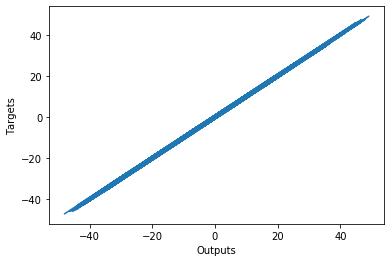

In [14]:
out = sess.run([outputs],feed_dict={inputs:traing_data["input"]})
plt.plot(np.squeeze(out), np.squeeze(traing_data["targets"]))
plt.xlabel("Outputs")
plt.ylabel("Targets")
plt.show()